# Linear Regression

#### Import of libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from matplotlib import pyplot as plt

#### Load dataset

In [3]:
dataLinear = pd.read_csv("genomes.csv", sep=";")
dataLinear.head()

,organism,group,size,GC,habitat,temp.group,temperature
0,Acaryochloris marina MBIC11017,Cyanobacteria,8.36,47.0,Aquatic,Mesophilic,NaN
1,Acholeplasma laidlawii PG-8A,Firmicutes,1.5,31.9,Specialized,Mesophilic,37.0
2,Acidiphilium cryptum JF-5,Alphaproteobacteria,3.97,67.1,Multiple,Mesophilic,35.0
3,Acidithiobacillus ferrooxidans ATCC 53993,Other Bacteria,2.9,58.9,Specialized,Mesophilic,NaN
4,Acidothermus cellulolyticus 11B,Actinobacteria,2.4,66.9,Aquatic,Thermophilic,58.0


#### Preparation of a dataset

In [5]:
dataLinear[dataLinear.columns[2]] = dataLinear[dataLinear.columns[2]].replace(".", np.nan)
dataLinear['size'] = dataLinear['size'].astype(float)
dataLinear[dataLinear.columns[2]] = dataLinear[dataLinear.columns[2]].fillna(dataLinear[dataLinear.columns[2]].mean())
print(dataLinear['size'])
dataLinear[dataLinear.columns[3]] = dataLinear[dataLinear.columns[3]].replace(0, np.nan)

0      8.360000
1      1.500000
2      3.970000
3      2.900000
4      2.400000
         ...   
719    4.910000
720    4.800000
721    4.770000
722    4.700000
723    3.567832
Name: size, Length: 724, dtype: float64


#### Relationship between GC pairs and genome size

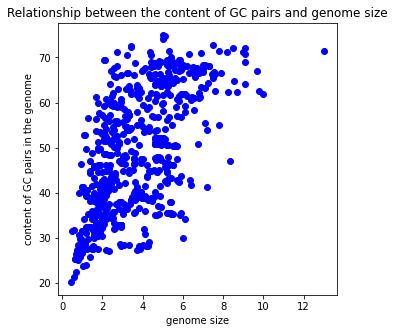

In [8]:
x = dataLinear['size']
y = dataLinear['GC']
plt.figure(figsize=(5, 5))
plt.plot(x, y, 'bo')
plt.xlabel("genome size")
plt.ylabel("content of GC pairs in the genome")
plt.title("Relationship between the content of GC pairs and genome size")
plt.show()

#### Median content of GC pairs in the genome

In [5]:
dataLinear.median()

size            3.285
GC             46.600
temperature    37.000
dtype: float64

GC : 46.6

#### The environment in which bacteria live most often

In [6]:
dataLinear.groupby('habitat').size()

habitat
Aquatic            126
Host-associated    272
Multiple           205
Specialized         67
Terrestrial         40
dtype: int64

Host-associated: 272

#### Amount of organisms living in extremely low temperatures

In [7]:
dataLinear.groupby('temp.group').size()

temp.group
Hyperthermophilic     28
Mesophilic           636
Psychrophilic         14
Thermophilic          46
dtype: int64

Psychrophilic: 14

#### Dataframe description

In [8]:
dataLinear.describe().T


,count,mean,std,min,25%,50%,75%,max
size,724.0,3.569274,1.883809,0.42,2.0,3.285,4.8825,13.03
GC,719.0,47.820028,13.144451,20.10,37.4,46.600,59.5500,74.90
temperature,402.0,38.356716,16.210393,7.00,30.0,37.000,37.0000,103.00


#### Applying linear regression

$H_0:$ There is no correlation between the content of GC pairs in the bacterial genome and its size.

$H_1:$ There is correlation between the content of GC pairs in the bacterial genome and its size.

In [9]:
# sklearn:
dataLinear = dataLinear.dropna()
x = np.array(dataLinear['size']).reshape((-1, 1)) 
y = dataLinear['GC']
regSKL = LinearRegression()
regSKL.fit(x,y)
print(f"intercept: {regSKL.intercept_}")
print(f"coef: {regSKL.coef_}")
print(f"R^2: {regSKL.score(x,y)}")

intercept: 34.08413789943083
coef: [4.04092203]
R^2: 0.31494424451929337


function form:

$y = 34.08 + 4.04x_1 + e$

In [10]:
# statsmodel:
x = sm.add_constant(x)
regSM = sm.OLS(y,x)
res = regSM.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GC   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     178.4
Date:                Wed, 03 Mar 2021   Prob (F-statistic):           9.70e-34
Time:                        14:48:51   Log-Likelihood:                -1479.1
No. Observations:                 390   AIC:                             2962.
Df Residuals:                     388   BIC:                             2970.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.0841      1.203     28.328      0.000      31.719      36.450
x1             4.0409      0.303     13.356      0.000       3.446       4.636
==============================================================================
Omnibus:                       11.758   Durbin-Watson:                   0.908
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                6.390
Skew:                           0.096   Prob(JB):                       0.0410
Kurtosis:                       2.403   Cond. No.                         9.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Are the residuals from the normal distribution?

In [18]:
from scipy import stats
stats.shapiro(res.resid)

ShapiroResult(statistic=0.9887175559997559, pvalue=0.004148722160607576)

Residuals are not from a normal distribution